In [1]:
# import library yang dibutuhkan
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
import nltk.stem as stemmer

from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('buruh_tweets_202112.csv')
display(df.head())

# melihat isi datanya
for i in df['tweet']:
    print(i)

,tweet,userid
0,"Tak Sesuai Kesepakatan, Buruh Tangerang Raya T...",58880688
1,@Resty442_ Kenapa demo buruh yg berjubel2 dapa...,1330047738541694978
2,Demo Buruh Rentan Ditunggangi Provokator\nhttp...,1213739491384426497
3,"@geloraco buruh, PP juga kemarin demo gak ada ...",930191748688592896
4,Berikanlah kepada buruh upahnya sebelum kering...,62988958


Tak Sesuai Kesepakatan, Buruh Tangerang Raya Tolak Penetapan UMK Banten 2022 hingga Ancam Aksi Besar-besaran https://t.co/sbVetqbNMO
@Resty442_ Kenapa demo buruh yg berjubel2 dapat izin?....makin terang benderang siapa mereka
Demo Buruh Rentan Ditunggangi Provokator
https://t.co/I4Y5n7gAWN
Ayo Disiplin Prokes
@geloraco buruh, PP juga kemarin demo gak ada tuh pasal2an.. yg ada polisi yg jadi pasien... 
di bali juga simpatisan OPM asoy aja sampe tawuran malah.. sila ke 5 diumpetin kemana..?
Berikanlah kepada buruh upahnya sebelum kering keringatnya. (HR. Abu Yu'la)
Gaji klau boss x kasi full seperti yang di janjikan, boleh report dkt pejabat buruh x?
Ratusan buruh yang tergabung dalam Forum Komunikasi Pekerja Antar Kebun (FK PAK) menggelar demonstrasi di Kantor Pemkab hingga DPRD Jember, Rabu. https://t.co/bUt1hvcaGB
Buruh Ngeluh UMP Naik Dikit, Bahlil: Yus Sama-sama Berjiwa Besar https://t.co/agNNz2vptF
@yarachantique Buruh g punya hati, bajingan
@ZZulfikli 1)Kena perkasakan pejabat bur

In [3]:
print('''dari data tweet di atas, dapat dilihat bahwa pada kolom tweet, terdapat beberapa simbol, huruf, dan 
kata yang tidak enak dipandang, oleh karena itu akan dilakukan pra-preprocessing data text.''')

dari data tweet di atas, dapat dilihat bahwa pada kolom tweet, terdapat beberapa simbol, huruf, dan 
kata yang tidak enak dipandang, oleh karena itu akan dilakukan pra-preprocessing data text.


In [4]:
# A. cleaning data text menggunakan case folding
# case folding merupakan metode cleaning data text dimana kumpulan kata pada kolom tersebut 
# akan ditransformasi menjadi lowercase, artinya semua angka, tanda baca, huruf besar, 
# alamat situs, dsb diganti/dihilangkan

# 1. membuat kumpulan kata pada kolom tersebut menjadi lowercase
# membuat kolom baru dengan nama clean_tweet    
df['clean_tweet'] = df['tweet'].str.lower()

# menghilangkan alamat url
df['clean_tweet'] = df['clean_tweet'].replace('http\S+|www\S+|https\S+', '', regex = True)  

display(df.head()) 

# memeriksa apakah alamat urlnya sudah terhapus atau belum
for i in df['clean_tweet']:
    print(i)  

,tweet,userid,clean_tweet
0,"Tak Sesuai Kesepakatan, Buruh Tangerang Raya T...",58880688,"tak sesuai kesepakatan, buruh tangerang raya t..."
1,@Resty442_ Kenapa demo buruh yg berjubel2 dapa...,1330047738541694978,@resty442_ kenapa demo buruh yg berjubel2 dapa...
2,Demo Buruh Rentan Ditunggangi Provokator\nhttp...,1213739491384426497,demo buruh rentan ditunggangi provokator\n\nay...
3,"@geloraco buruh, PP juga kemarin demo gak ada ...",930191748688592896,"@geloraco buruh, pp juga kemarin demo gak ada ..."
4,Berikanlah kepada buruh upahnya sebelum kering...,62988958,berikanlah kepada buruh upahnya sebelum kering...


tak sesuai kesepakatan, buruh tangerang raya tolak penetapan umk banten 2022 hingga ancam aksi besar-besaran 
@resty442_ kenapa demo buruh yg berjubel2 dapat izin?....makin terang benderang siapa mereka
demo buruh rentan ditunggangi provokator

ayo disiplin prokes
@geloraco buruh, pp juga kemarin demo gak ada tuh pasal2an.. yg ada polisi yg jadi pasien... 
di bali juga simpatisan opm asoy aja sampe tawuran malah.. sila ke 5 diumpetin kemana..?
berikanlah kepada buruh upahnya sebelum kering keringatnya. (hr. abu yu'la)
gaji klau boss x kasi full seperti yang di janjikan, boleh report dkt pejabat buruh x?
ratusan buruh yang tergabung dalam forum komunikasi pekerja antar kebun (fk pak) menggelar demonstrasi di kantor pemkab hingga dprd jember, rabu. 
buruh ngeluh ump naik dikit, bahlil: yus sama-sama berjiwa besar 
@yarachantique buruh g punya hati, bajingan
@zzulfikli 1)kena perkasakan pejabat buruh malaysia buat macam singapore pejabat buruh di orang sangat tegas dan sistematik siap bol

In [5]:
# mendelete username
df['clean_tweet'] = df['clean_tweet'].replace('@[\w]+', '', regex = True)

# memeriksa kembali
for i in df['clean_tweet']:
    print(i) 

tak sesuai kesepakatan, buruh tangerang raya tolak penetapan umk banten 2022 hingga ancam aksi besar-besaran 
 kenapa demo buruh yg berjubel2 dapat izin?....makin terang benderang siapa mereka
demo buruh rentan ditunggangi provokator

ayo disiplin prokes
 buruh, pp juga kemarin demo gak ada tuh pasal2an.. yg ada polisi yg jadi pasien... 
di bali juga simpatisan opm asoy aja sampe tawuran malah.. sila ke 5 diumpetin kemana..?
berikanlah kepada buruh upahnya sebelum kering keringatnya. (hr. abu yu'la)
gaji klau boss x kasi full seperti yang di janjikan, boleh report dkt pejabat buruh x?
ratusan buruh yang tergabung dalam forum komunikasi pekerja antar kebun (fk pak) menggelar demonstrasi di kantor pemkab hingga dprd jember, rabu. 
buruh ngeluh ump naik dikit, bahlil: yus sama-sama berjiwa besar 
 buruh g punya hati, bajingan
 1)kena perkasakan pejabat buruh malaysia buat macam singapore pejabat buruh di orang sangat tegas dan sistematik siap boleh saman mana mana company mana yang langga

 ksm siasat dakwaan syarikat pembuatan barang elektronik terbabit buruh paksa dat  
 buruh disuruh berjiwa besar untuk tak menuntut upah tinggi, sedangkan kalian gaji lebih tinggi dengan segala fasilitas mewah yang mencukupi. dasar bahlil eh bahlul lo 

gimana kalo dibalik bapak seperti posisi kami apa mau? apa mau diam aja? enggak kan pasti bakal menuntut juga
aksi demo buruh yang ditunggangi kelompok kepentingan 
aksi demo buruh yang ditunggangi kelompok kepentingan 
daftar lengkap umk se-jawa tengah 2022, serikat buruh fkspn kecewa pada gubernur ganjar pranowo
 

demo buruh rentan ditunggai provokator 
  gurunya apa dulu nih? klo pns ya ikut peraturan asn. klo swasta ya sama-sama buruh lah, tergantung "perusahaannya". klo honorer ya diluar konteks sih.
ngewanti wanti yen dtakoni kncaku buruh nendi njawabe nganggur, alesan salah sijine meng disilihi duid. arep nolak pekewuh nek ra ditolak le bali setaunan😶
 dan aparat gak berdaya, kalah sm buruh
cc. 
sebut penetapan umk 2022 jateng i

presiden konfederasi serikat pekerja indonesia (kspi) said iqbal mengakui bahwa omnibus law cipta kerja merupakan kekalahan telak pergerakan politik kaum buruh.  
jika gubernur tidak naikkan upah tahun 2022, buruh ancam akan mogok nasional  
meski urungkan aksi, aliansi buruh batam tetap kawal umk batam 2022  
pandemi covid-19 telah membuat banyak perusahaan merugi. menteri investasi dan kepala bkpm bahlil lahadalia meminta buruh agar lebih bijaksana dan berjiwa besar untuk tidak menuntut upah tinggi tahun depan.


ciri khas salah satu hamba oligarkhi itu dgn menekan buruh utk tetap menderita? yg dibela kepentingan siapa? buruh? gak mungkin! 
 sehari setelah omnibus dinyatakan inkonstusional. para buruh di kotaku demo, di jateng, karena cuma nail 1400. orang-orang menengah ke atas sibuk naikin isu "buruh demo kok pake pcx?" padahal ada buruh yang harus ngekos sambil ngasuh anak, single parent juga.
mulai awal tahun depan pekerja terkena phk mendapatkan jaminan uang dan pelatihan.
#tren

In [6]:
# 2. menghapus angka yang terdapat dalam setiap tweet
df['clean_tweet'] = df['clean_tweet'].replace('\d+', '', regex = True)

# memeriksa kembali
for i in df['clean_tweet']:
    print(i) 

tak sesuai kesepakatan, buruh tangerang raya tolak penetapan umk banten  hingga ancam aksi besar-besaran 
 kenapa demo buruh yg berjubel dapat izin?....makin terang benderang siapa mereka
demo buruh rentan ditunggangi provokator

ayo disiplin prokes
 buruh, pp juga kemarin demo gak ada tuh pasalan.. yg ada polisi yg jadi pasien... 
di bali juga simpatisan opm asoy aja sampe tawuran malah.. sila ke  diumpetin kemana..?
berikanlah kepada buruh upahnya sebelum kering keringatnya. (hr. abu yu'la)
gaji klau boss x kasi full seperti yang di janjikan, boleh report dkt pejabat buruh x?
ratusan buruh yang tergabung dalam forum komunikasi pekerja antar kebun (fk pak) menggelar demonstrasi di kantor pemkab hingga dprd jember, rabu. 
buruh ngeluh ump naik dikit, bahlil: yus sama-sama berjiwa besar 
 buruh g punya hati, bajingan
 )kena perkasakan pejabat buruh malaysia buat macam singapore pejabat buruh di orang sangat tegas dan sistematik siap boleh saman mana mana company mana yang langgar arahan

 akskaka gw tremoor buruh oxsigen
 makin banyak buruh harian lepas kehilangan job deh
penetapan kenaikan ump  sebesar , persen, memicu penolakan dari para buruh. akankah pemerintah merevisi kenaikan ump ini?
 
temukan jawabannya di  #satumejatheforum sesaat lagi di kompastv!
 
streaming:  
umk naik tipis, buruh di wonogiri harapkan ada subsidi sembako - radar solo  #wonogiri #beritawonogiri 
pekerja wajib berjiwa besar &gt;&gt; 

#buruh #forumkeadilan #majalahforum #fkcommunication
upah di jateng terendah se indonesia, buruh anggap ganjar tak pro wong cilik 
 bisa bilang berjiwa besar..krena gajih bapak bukan umk/ump ! posisikan bapak ada di pihak kami para buruh..jgn ikut menghantam  derita..
 berhentilah memperdagangkan keluguan kaum buruh untuk transaksi politik. 
kalian tipu kaum buruh, sedang kalian enak" kan bersulang di hotel mewah sambil menghitung laba. 
sama dengan kaum buruh
prosedurnya jelas, mengikuti alur logika birokrasi. sekarang, pusat mau ngga naikin upah buruh ?? kat

buruh???
sanajan pangangguran, kamari urang mah milu démo buruh, da urang gé buruh.
apan mun di titah ku mamah sok ménta buruh.
kalangan buruh menuding uu cipta kerja yang bentuknya omnibus law telah dipelintir oleh sekelompok menteri. undang-undang ini disebut hanya pro pada pengusaha. 
stadion bagus dengan tumbal enam ribu lebih buruh migran~ 
presiden konfederasi serikat pekerja indonesia (kspi) said iqbal mengakui bahwa omnibus law cipta kerja merupakan kekalahan telak pergerakan politik kaum buruh.  
kalangan buruh menuding uu cipta kerja yang bentuknya omnibus law telah dipelintir oleh sekelompok menteri. undang-undang ini disebut hanya pro pada pengusaha. 
 cari buruh apa budak?
presiden konfederasi serikat pekerja indonesia (kspi) said iqbal mengakui bahwa omnibus law cipta kerja merupakan kekalahan telak pergerakan politik kaum buruh.  
jika gubernur tidak naikkan upah tahun , buruh ancam akan mogok nasional  
meski urungkan aksi, aliansi buruh batam tetap kawal umk batam   
p

In [7]:
# 3. menghapus tanda baca
df['clean_tweet'] = df['clean_tweet'].str.translate(str.maketrans("","",string.punctuation))

# memeriksa kembali
for i in df['clean_tweet']:
    print(i) 

tak sesuai kesepakatan buruh tangerang raya tolak penetapan umk banten  hingga ancam aksi besarbesaran 
 kenapa demo buruh yg berjubel dapat izinmakin terang benderang siapa mereka
demo buruh rentan ditunggangi provokator

ayo disiplin prokes
 buruh pp juga kemarin demo gak ada tuh pasalan yg ada polisi yg jadi pasien 
di bali juga simpatisan opm asoy aja sampe tawuran malah sila ke  diumpetin kemana
berikanlah kepada buruh upahnya sebelum kering keringatnya hr abu yula
gaji klau boss x kasi full seperti yang di janjikan boleh report dkt pejabat buruh x
ratusan buruh yang tergabung dalam forum komunikasi pekerja antar kebun fk pak menggelar demonstrasi di kantor pemkab hingga dprd jember rabu 
buruh ngeluh ump naik dikit bahlil yus samasama berjiwa besar 
 buruh g punya hati bajingan
 kena perkasakan pejabat buruh malaysia buat macam singapore pejabat buruh di orang sangat tegas dan sistematik siap boleh saman mana mana company mana yang langgar arahan
 kudu redefinisi ulang atau meman

  ayah aku dulu buruh ngga ga punya mobil dan ga sekolahin anak di sit 🥲 buat bayar semesteran aa juga minjem sana sini hehe
 coba uji mulutmu di depan para buruh gih
uu cipta kerja mantep banget dah menguntungkan pengusaha kenaikan ump berdasarkan formula uu tsb hasilnya kenaikannya cuma  tahun depan pun bakal ga beda jauh kenaikan upah di bawah inflasi artinya upah buruh malah tergerus bukannya naik keterlaluan 😆
yang ikut komen padahal buruh juga budak korporat bisanya bilang gitu🙄 
aksi buruh tuntut umk  makin besar gubernur jawa barat kemana

 kemaren ada demo buruh lmyn banyak pesertanya n semua baek saja terus knp reuni  plus doa bersama utk nkri ga dpt ijin putihkanjakarta
 yuuuuk berjiwa besar sekali kali jadi buruh yuuuuk 

 akskaka gw tremoor buruh oxsigen
 makin banyak buruh harian lepas kehilangan job deh
penetapan kenaikan ump  sebesar  persen memicu penolakan dari para buruh akankah pemerintah merevisi kenaikan ump ini
 
temukan jawabannya di  satumejatheforum sesaat lag

verifikasi rampung  ribu buruh di kudus bakal terima blt cukai 
 selama kerja sama orang lain ya termasuk buruh
 pak mentri jg berjiwa besar jika menerima gaji seperti buruh bacot seenak udele bae 🤣🤣🤣
 lawak masa karena pemotongan anggaran kirain karena gaji buruh kaga di naikin😭
 sementara itu
bahlil ajak buruh berjiwa besar tak tuntut upah tinggi 
ribuan buruh gerudug pendopo sukabumi tuntut bupati cabut rekomendasi kenaikan umk sukabumi  
upah buruh  terus mengalami penurunan secara sistem

upah nominal memang naik
tapi upah riil semakin menurun

dulu perhitungannnya
survey kebutuhan hidup layak  inflasi  pertumbuhan ekonomi

era rejim jkw
diubah lewat pp 
skrg pp 

rejim upah murah
uyeee 
 mudah kali kau cakap
kau enak gaji besar dg fasilitas lain 
buruh
sanajan pangangguran kamari urang mah milu démo buruh da urang gé buruh
apan mun di titah ku mamah sok ménta buruh
kalangan buruh menuding uu cipta kerja yang bentuknya omnibus law telah dipelintir oleh sekelompok menteri undangund

In [8]:
# 4. menghapus whitespaces
df['clean_tweet'] = df['clean_tweet'].str.strip()

# memeriksa kembali
for i in df['clean_tweet']:
    print(i) 

tak sesuai kesepakatan buruh tangerang raya tolak penetapan umk banten  hingga ancam aksi besarbesaran
kenapa demo buruh yg berjubel dapat izinmakin terang benderang siapa mereka
demo buruh rentan ditunggangi provokator

ayo disiplin prokes
buruh pp juga kemarin demo gak ada tuh pasalan yg ada polisi yg jadi pasien 
di bali juga simpatisan opm asoy aja sampe tawuran malah sila ke  diumpetin kemana
berikanlah kepada buruh upahnya sebelum kering keringatnya hr abu yula
gaji klau boss x kasi full seperti yang di janjikan boleh report dkt pejabat buruh x
ratusan buruh yang tergabung dalam forum komunikasi pekerja antar kebun fk pak menggelar demonstrasi di kantor pemkab hingga dprd jember rabu
buruh ngeluh ump naik dikit bahlil yus samasama berjiwa besar
buruh g punya hati bajingan
kena perkasakan pejabat buruh malaysia buat macam singapore pejabat buruh di orang sangat tegas dan sistematik siap boleh saman mana mana company mana yang langgar arahan
kudu redefinisi ulang atau memang belum 

self rewardku saat ini ndrakor  episode setelah pulang buruh jam  pm 💃
capek kaki sakit semua jadi buruh
akta buruh yang ketinggalan zaman

akta yang sepatutnya menjaga kebajikan rakyat sebaliknya menjadi akta yang melindungi majikan sahaja dah merdeka  tahun tapi masih pakai akta buruh tahun
dari judulnya aja udah beda interpretasi pakai kata skincare ya euphemism pun iya buat skincare apakah buruh hrs buluk terus 

plus opini di bawah negasin opini orang yg tinggal di menara gading with lack of empathy
tak pantas pimpinan buruh hidip mewah tapi teriak hidup susah tak mampu hidup sederhana tinggalkanlah pimpinan partai buruh
kasian nasib buruhmereka harus terooosss bersabar
ditengah kebutuhan hidup yg meningkatharga yg mahal
kondisi saat ini sama tidak menguntungkan bagi pengusaha mau para pekerja
sama harus sabarrrrrr
serius nanyapengurus serikat buruh itu rata statusnya buruh perusahaan  kerja dan terina gaji atau bukan sihkalau digaji hnya via iuran anggota serikat apa bs layak dap

pasal  kuhp itu ada hubungannya dg coronaburuh demo kenapa di kasi izin
semoga upaya pak  ini bisa dimengerti baik o buruh maupun pengusaha

menurut ganjar penggunaan susu dilakukan karena pihaknya tak punya ruang gerak leluasa dalam menetapkan umk pasalnya pp  sudah mengatur formula penetapan umk
seandainya buruh jogja kompak kudeta
panitia mempertanyakan mengapa reuni  di patung kuda dilarang sedangkan demo buruh dan mahasiswa di lokasi yang sama diperbolehkan
reuni
buruh harus berjiwa besar
pejabat harus bergaji besar
pengen banget kak lanjut sekolah lagi biar bisa ngangkat derajat ortu 
putus sekolah karena ekonomi kakbapak saya meninggal sejak saya kelas  sd saya putus sekolah sejak lulus smp
kerja buruh dirumah orang pengeeeeen banget sekolah lagi sampe sarjana semoga rezeki aamiiin
terus demo buruh yg ribuan itu kumpulan orang bukan ya
buruh yakin dgn pernyataan itu buruh gigit jariketuanya adem ayemheheheciannn tu buruh
ayah aku dulu buruh ngga ga punya mobil dan ga sekolahin a

buruh sukoharjo sempat berharap umk  naik jadi rp  tapi ditetapkan hanya 
 
 lewat
panjang umur perlawanan

setelah covid lagi buruh yang harus merasakan kepahitan kami melawan karena upah adalah urat nadi bagi kami kaum buruh
kami minta pemerintah berjiwa besar dgn memberikan upah yg layak untuk buruh
yg dituntut buruh itu cuma upah minimum pak bahlul  perhitungannya berdasarkan khl kebutuhan hidup layak bukan upah maksimum☹️😡
kalo reuni ga boleh ganti jadi demo boleh kek buruh kemaren demo ke balkot
buntut penetapan ump buruh di jawa timur ancam mogok kerja massal
low gajinya kayak buruh juga dongbagaimana😁😁😅😅
verifikasi rampung  ribu buruh di kudus bakal terima blt cukai
selama kerja sama orang lain ya termasuk buruh
pak mentri jg berjiwa besar jika menerima gaji seperti buruh bacot seenak udele bae 🤣🤣🤣
lawak masa karena pemotongan anggaran kirain karena gaji buruh kaga di naikin😭
sementara itu
bahlil ajak buruh berjiwa besar tak tuntut upah tinggi
ribuan buruh gerudug pendopo sukab

In [9]:
# B. menghilangkan stopwords
# karena tidak ada ketentuan stopwords yang harus dihilangkan, maka akan digunakan libary nltk
stopwords_indo = stopwords.words('indonesian')

df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_indo)]))

# memeriksa kembali
for i in df['clean_tweet']:
    print(i) 

sesuai kesepakatan buruh tangerang raya tolak penetapan umk banten ancam aksi besarbesaran
demo buruh yg berjubel izinmakin terang benderang
demo buruh rentan ditunggangi provokator ayo disiplin prokes
buruh pp kemarin demo gak tuh pasalan yg polisi yg pasien bali simpatisan opm asoy aja sampe tawuran sila diumpetin kemana
berikanlah buruh upahnya kering keringatnya hr abu yula
gaji klau boss x kasi full janjikan report dkt pejabat buruh x
ratusan buruh tergabung forum komunikasi pekerja kebun fk menggelar demonstrasi kantor pemkab dprd jember rabu
buruh ngeluh ump dikit bahlil yus samasama berjiwa
buruh g hati bajingan
kena perkasakan pejabat buruh malaysia singapore pejabat buruh orang sistematik saman company langgar arahan
kudu redefinisi ulang paham definisi buruh kali selebgram
lulusan s mamarika ubah pp buruh dkijakarta kemnaker 😂 bro kewenangan kemnaker uang servis pengangkatan pemberhentian dewan pengupahanthr struktur skala upah
yuk berjiwa gaji disamakan gaji buruh
buruh ker

In [10]:
# menghilangkan emoji twitter
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

# memeriksa kembali
for i in df['clean_tweet']:
    print(i) 

sesuai kesepakatan buruh tangerang raya tolak penetapan umk banten ancam aksi besarbesaran
demo buruh yg berjubel izinmakin terang benderang
demo buruh rentan ditunggangi provokator ayo disiplin prokes
buruh pp kemarin demo gak tuh pasalan yg polisi yg pasien bali simpatisan opm asoy aja sampe tawuran sila diumpetin kemana
berikanlah buruh upahnya kering keringatnya hr abu yula
gaji klau boss x kasi full janjikan report dkt pejabat buruh x
ratusan buruh tergabung forum komunikasi pekerja kebun fk menggelar demonstrasi kantor pemkab dprd jember rabu
buruh ngeluh ump dikit bahlil yus samasama berjiwa
buruh g hati bajingan
kena perkasakan pejabat buruh malaysia singapore pejabat buruh orang sistematik saman company langgar arahan
kudu redefinisi ulang paham definisi buruh kali selebgram
lulusan s mamarika ubah pp buruh dkijakarta kemnaker  bro kewenangan kemnaker uang servis pengangkatan pemberhentian dewan pengupahanthr struktur skala upah
yuk berjiwa gaji disamakan gaji buruh
buruh kera

sad bwt kaum buruh robot asing 
hilangnya keadilan kaum buruh
jiwa buruh bro ditengah pandemi berkepanjangan hantu phk merajalela  kalo negara berbagi berkah pcr gak dosa 
bacot doang bijimane kalo elu tambahin upah buruh dana operasional gubwagub dki gblk
bersyukurlah yg memilih jokowi pro rakyat pro buruh 
tuntutan buruh melebihi khl kebutuhan hidup layak khl kajian kebutuhan hidup buruh klw pejabat mengayakan buruh jgn nuntut upah ga ngerti tuntutan buruh yg menuntut hidup layak
buku menarik partai idealis menyerap aspirasi rakyat masuk pemerintahan mengkritik kebijakan merugikan masyarakat diacungi jempol partai buruh inggris 
pejabat yg gunanya gajinya beratusratus kali lipat upah buruh
mah enak ga ngerasa susah digaji uang rakyat uang buruh yg sdg kesejahteraan keadilan
upah buruh beli bandingkan royalti batubara trilyun pendapatan pajak ri hilang
licik sengaja tetapkan kenaikan umr biar buruh demo lempar pusat
anies udah menemui buruh yg berdemomasalah tuntutan bicarakan
diadaka

In [11]:
# stemming data, stemming data merupakan transformasi kata ke dalam bentuk dasarnya
factory = StemmerFactory()
stemmer = factory.create_stemmer()

hasil_stem = []
for kalimat in df['clean_tweet']:
    hasil_stem.append(stemmer.stem(kalimat))   

In [12]:
# mereplace kolom sebelumnya dengan yang baru hasil stem
df['clean_tweet'] = hasil_stem

for i in df['clean_tweet']:
    print(i)

sesuai sepakat buruh tangerang raya tolak tetap umk banten ancam aksi besarbesaran
demo buruh yg jubel izinmakin terang benderang
demo buruh rentan tunggang provokator ayo disiplin prokes
buruh pp kemarin demo gak tuh pasal yg polisi yg pasien bal simpatisan opm asoy aja sampe tawur sila diumpetin mana
beri buruh upah kering keringat hr abu yula
gaji klau boss x kasi full janji report dkt jabat buruh x
ratus buruh gabung forum komunikasi kerja kebun fk gelar demonstrasi kantor pemkab dprd jember rabu
buruh ngeluh ump dikit bahlil yus samasama jiwa
buruh g hati bajing
kena perkasa jabat buruh malaysia singapore jabat buruh orang sistematik saman company langgar arah
kudu redefinisi ulang paham definisi buruh kali selebgram
lulus s mamarika ubah pp buruh dkijakarta kemnaker bro wenang kemnaker uang servis angkat henti dewan pengupahanthr struktur skala upah
yuk jiwa gaji sama gaji buruh
buruh kerakter kelas bnyak buruh yg oportunis induvidualis sok cere kondisi sosial gila jabat
bahlil a

In [13]:
# C. menghilangkan slang languange

# membuat slang wordnya (sebagian, karena banyak bangetttt)
slang_word = ['besarbesaran', 'izinmakin', 'pp', 'gak', 'tuh', 'yg', 'opm',
              'aja', 'mana', 'hr', 'abu', 'yula', 'klau', 'dkt', 'fk', 'yus',
              'g', 'hati', 'bajing', 'kena', 's', 'pengupahanthr', 'yuk', 'sok', 
              'cere', 'ga', 'knp', 'skrg', 'dmn', 'bpk', 'jg', 'ig', 'emg', 'klo', 
              'jd', 'sdh', 'dgn', 'aju', 'n', 'ya', 'kengr', 'sj', 'ktnya', 'duh', 
              'ngak', 'elu', 'amp', 'adl', 'si', 'tolol', 'dll', 'khl', 'pdkng', 'mun', 
              'kb', 'poho', 'keur', 'ka', 'gk', 'dri', 'yo', 'we', 'in', 'i', 'r', 'dsb',
              'suoer', 'sy', 'tdak', 'tlg', 'gilran', 'wan abud', 'sok', 'pa', 'ngga', 'krn', 
              'lu', 'org', 'utk', 'nggak', 'pas', 'deh', 'moga', 'tau', 'pd', 'tp', 'gw', 'blm',
              'tdk', 'byk', 'gin', 'dr', 'ma', 'sampe', 'dah', 'dg']

df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (slang_word)]))

# memeriksa kembali
for i in df['clean_tweet']:
    print(i) 

sesuai sepakat buruh tangerang raya tolak tetap umk banten ancam aksi
demo buruh jubel terang benderang
demo buruh rentan tunggang provokator ayo disiplin prokes
buruh kemarin demo pasal polisi pasien bal simpatisan asoy tawur sila diumpetin
beri buruh upah kering keringat
gaji boss x kasi full janji report jabat buruh x
ratus buruh gabung forum komunikasi kerja kebun gelar demonstrasi kantor pemkab dprd jember rabu
buruh ngeluh ump dikit bahlil samasama jiwa
buruh
perkasa jabat buruh malaysia singapore jabat buruh orang sistematik saman company langgar arah
kudu redefinisi ulang paham definisi buruh kali selebgram
lulus mamarika ubah buruh dkijakarta kemnaker bro wenang kemnaker uang servis angkat henti dewan struktur skala upah
jiwa gaji sama gaji buruh
buruh kerakter kelas bnyak buruh oportunis induvidualis kondisi sosial gila jabat
bahlil ajak buruh jiwa tuntut upah bukti petinggi negeri penting modal tuhan bkn orang arab bukti kata petinggi negara keruh pancing ricuh publik rusakr

buruh tangerang mogok kerja umk sesuai
kasadrasakesed mndidih darah lihat derita spt akibat kuat oligarki
jokowi kemanamana timbul kerumun ramai amanaman kmarin buruh ormas kumpul demo aman reuni tertib kalem
rakyat buruh mpr tuntut tinggikarena kondisi uang rakyat sulit pandemi
gumbernur dki surati kemenaker unjuk buruh dlm tuntut naik upah baca uu thn thn mangkenye loe ngabacot jgn bodoh dungu unlimited loe bro
pt patuh hukum indonesia boikotaice buruh d phk d kerja kembaliboikotaice
buruh ngajarkeun pake pods libur via vc
faktor pake klx nabung kuat tenaga beli bekas biar harga murah kerja samping buruh gaji gede suara aspirasi gaji rendah alias salah sih buruh ken pake klx
buruh sukoharjo harap umk rp tetap tribun solo sukoharjo sukoharjomakmur beritasukoharjo
silap haribulan engineer orang buruh orang dana milik orang tapak tanah melayu aje
serikat buruh naik banding fluktuasi harga butuh pokok
kabeh barang metu pabrik munggah kabeh lur ket september wing ngingong sambat rego pabr

In [14]:
print('--------------- Text Data Analytic ---------------')

--------------- Text Data Analytic ---------------


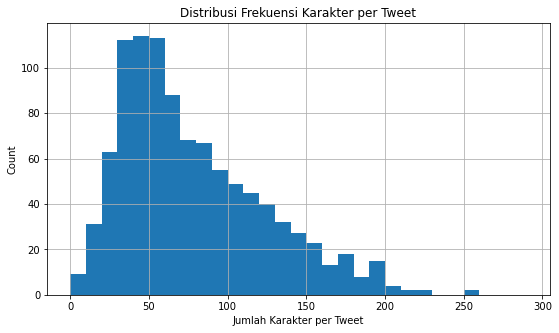

In [15]:
# a. Distribusi Frekuensi Karakter per Tweet

# mengatur ukuran figure
fig, ax = plt.subplots(figsize = (9,5))

# plot the data
bin_range = np.arange(0, 300, 10)
df['clean_tweet'].str.len().hist(bins=bin_range)

# membuat judul dan label untuk x dan y axis
plt.title('Distribusi Frekuensi Karakter per Tweet')
plt.xlabel('Jumlah Karakter per Tweet')
plt.ylabel('Count')

plt.show()

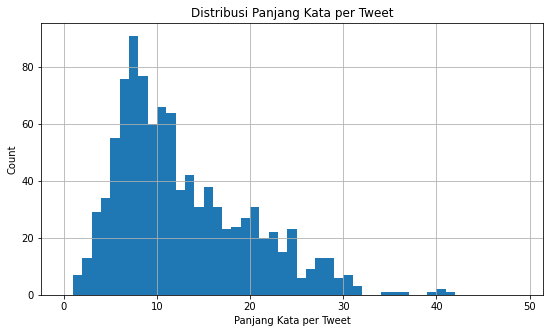

In [16]:
# b. Distribusi panjang kata per tweet

# mengatur ukuran figure
fig, ax = plt.subplots(figsize = (9,5))

# plot the data
bin_range = np.arange(0, 50)
df['clean_tweet'].str.split().map(lambda x: len(x)).hist(bins=bin_range)

# membuat judul dan label untuk x dan y axis
plt.title('Distribusi Panjang Kata per Tweet')
plt.xlabel('Panjang Kata per Tweet')
plt.ylabel('Count')

plt.show()

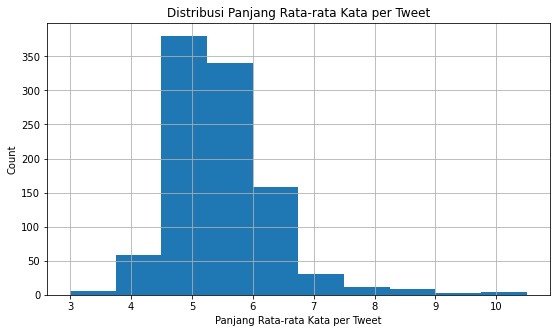

In [17]:
# c. Distribusi panjang rata-rata kata per tweet

# mengatur ukuran figure
fig, ax = plt.subplots(figsize = (9,5))

# plot the data
df['clean_tweet'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

# membuat judul dan label untuk x dan y axis
plt.title('Distribusi Panjang Rata-rata Kata per Tweet')
plt.xlabel('Panjang Rata-rata Kata per Tweet')
plt.ylabel('Count')

plt.show()

In [18]:
# d. Distribusi Kata

# melakukan tokenization pada dataset
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: word_tokenize(str(x)))
 
# memasukkan pada semua token tersebut pada satu list yang sama
 
clean_tweets = [word for tweet in df['clean_tweet'] for word in tweet]
 
# melihat berapa sample dan keluarannya
fqdist = FreqDist(clean_tweets)

print(fqdist)

<FreqDist with 3490 samples and 12232 outcomes>


In [19]:
# Untuk mengetahui kata dan jumlah dari masing-masing, dapat menggunakan :

# menampilkan frekuensi kata terbanyak dengan limit 25 
freq_kata = fqdist.most_common(25)

print(freq_kata)

[('buruh', 1124), ('demo', 231), ('gaji', 204), ('upah', 167), ('kerja', 143), ('jiwa', 106), ('umk', 103), ('usaha', 98), ('naik', 82), ('aksi', 76), ('tuntut', 72), ('hidup', 63), ('jabat', 60), ('ump', 58), ('pabrik', 58), ('bahlil', 50), ('rakyat', 50), ('orang', 48), ('tetap', 47), ('perintah', 47), ('indonesia', 46), ('ancam', 42), ('negara', 42), ('gubernur', 40), ('butuh', 40)]


In [20]:
f_kata = pd.DataFrame(freq_kata)
f_kata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       25 non-null     object
 1   1       25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


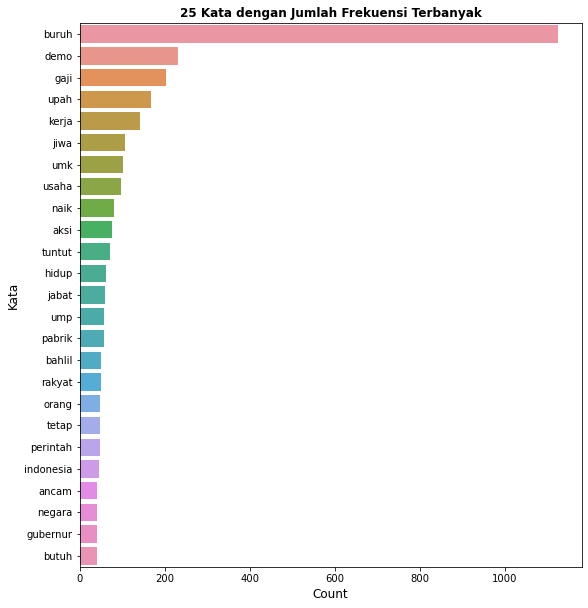

In [21]:
# mengatur figure
fig, ax = plt.subplots(figsize = (9,10))

# plot the data 
sns.barplot(data = f_kata, x = f_kata[1], y = f_kata[0], orient = 'h')

# membuat judul dan label untuk x dan y axis
plt.title('25 Kata dengan Jumlah Frekuensi Terbanyak', fontweight = 'bold')
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Kata', fontsize = 12)

plt.show()

In [22]:
# e. Distribusi bi-gram

hasil = pd.Series(nltk.ngrams(clean_tweets, 2)).value_counts()[:25]
print(hasil)

(demo, buruh)             100
(buruh, demo)              56
(buruh, pabrik)            35
(buruh, jiwa)              34
(upah, buruh)              33
(serikat, buruh)           27
(tuntut, upah)             25
(kaum, buruh)              24
(buruh, buruh)             22
(gaji, buruh)              22
(naik, upah)               22
(buruh, gaji)              19
(jiwa, tuntut)             18
(buruh, tuntut)            18
(mogok, kerja)             17
(umk, buruh)               17
(upah, minimum)            17
(kerja, buruh)             17
(cipta, kerja)             16
(buruh, tani)              16
(tetap, ump)               16
(tunggang, provokator)     15
(buruh, upah)              15
(naik, ump)                15
(buruh, ajak)              15
dtype: int64


In [23]:
# unpack list di dalam series
text = df['clean_tweet'].explode()

words = []
for i in text:
    words.append(i)
    
words_2 = ' '.join(words)

Word Cloud


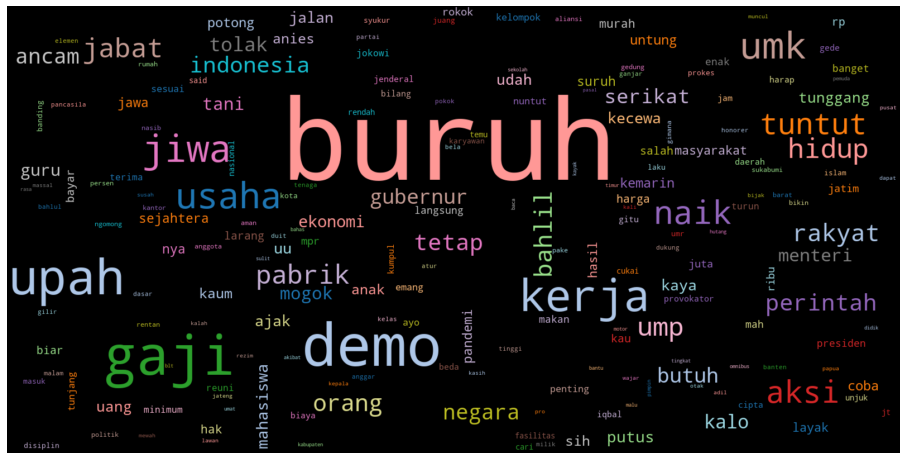

In [26]:
# mencoba untuk membuat wordcloud

print('Word Cloud')
# mengatur ukuran figure
fig, ax = plt.subplots(figsize = (16,14))

# membuat wordcloud
wc = WordCloud(width=1600, height=800, 
               max_font_size=200, max_words = 200, collocations = False,
               colormap = 'tab20', random_state = 7, relative_scaling = 0.6).generate(words_2)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
print('-------------------------------------------------- Interpretasi --------------------------------------------------')

-------------------------------------------------- Interpretasi --------------------------------------------------


Berdasarkan hasil analisis text yang diperoleh dari twitter, dapat disimpulkan bahwa :

1. Untuk grafik Jumlah Karakter per Tweet, distribusi terbanyak berada pada rentang 35 - 60 karakter per tweet.

2. Untuk grafik Distribusi Panjang Kata per Tweet, distribusi terbanyak berada pada rentang 7 - 9 kata per tweet.

3. Untuk grafik Distribusi Panjang Rata-rata Kata per Tweet, distribusi terbanyak berada pada rentang 5 - 6 karakter per kata per tweet. 

4. Artinya, mayoritas tweet berada pada 7 sampai 9 kata dengan setiap kata berada pada rentang 5 sampai 6 karakter dan totalnya berada pada 35 sampai dengan 60 karakter. 

5. Untuk grafik Distribusi Kata, dapat dilihat bahwa kata 'buruh', 'demo', 'gaji', dan 'upah', memiliki frekuensi terbanyak secara berturut-turut. kata 'buruh' menjadi kunci utama dalam tweet tersebut dan bisa disimpulkan bahwa keseluruhan tweet tersebut sedang membahas mengenai buruh yang demo menuntut kenaikan gaji/upah.

6. Dari hasil analisis menggunakan bi-gram, dapat disimpulkan bahwa tema dari keseluruhan tweet tersebut membahas tentang buruh. Ada apa dengan buruh ? dalam analisis tersebut banyak dibahas mengenai buruh pabrik yang demo dan serikat buruh yang menuntut kenaikan upah.

7. Pada analisis text menggunakan wordcloud, dapat dilihat bahwa kata 'buruh', 'upah', 'gaji', 'demo', 'kerja', memiliki font yang yang lebih besar dibandingkan dengan yang lain. Artinya adalah keseluruhan tweet tersebut banyak membahas mengenai buruh yang bekerja melakukan demo untuk menuntut kenaikan gaji/upah.

8. Dari informasi yang sudah dijelaskan, dapat diketahui bahwa hal tersebut merupakan masalah, terutama bagi pemilik perusahaan. Tentunya, masalah tersebut merupakan hal yang bersifat dilematis, di satu sisi mungkin saja pentapatan dan produktivitas berkurang dikarenakan wabah korona, di sisi yang lain buruh menuntut kenaikan gaji. Kemudian muncul pertanyaan, bagaimana pemerintah dapat membantu permasalahan yang seperti ini ? tentunya hal ini dapat dijawab oleh para ahli, baik dari perusahaan maupun dari pemerintah.

